In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
T = 100
n = 1
alpha = 0.9
beta = 0.2
gamma = 0.1
Lambda = [1,5]
cpd_z = [1-alpha,alpha,0.5]
Gamma = np.array(
    [
        [1-gamma,0,gamma],
        [0,1-gamma,gamma],
        [beta/2,beta/2,1-beta]
    ]
)



In [106]:
# Since numpy doesn't have built in support for categorical distribution
def categorical(distribution: np.array):
    # returns the result of a single sample drawn from a binomial distribution <distribution> 
    sample = np.random.multinomial(1,distribution)
    res = np.where(sample)[0][0]
    return res

In [107]:
C = np.zeros(T,dtype='int32')
Z = np.zeros((T,n),dtype='int32')
X = np.zeros((T,n),dtype='int32')
C[0] = 2
for t in range(T):
    if t == 0:
        pass
    else:
        C[t] = categorical(Gamma[C[t-1]])
    Z[t] = np.random.binomial(1,cpd_z[C[t]],size=n)
    for i in range(n):
        X[t][i] = np.random.poisson(Lambda[Z[t][i]])

    


Text(0.5, 0, 't')

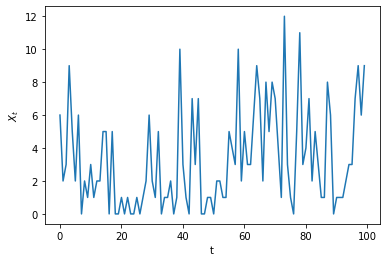

In [108]:
for i in range(n):
    plt.plot(X[0:,i])
plt.ylabel(r'$X_{t}$')
plt.xlabel('t')


In [109]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X,C)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [110]:
C

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [112]:
# new values for task 2 with different cpd_z

T = 100
n = 1
alpha = 0.9
beta = 0.2
gamma = 0.1
Lambda = [1,5]

cpd_z = np.array([
                [1-alpha, alpha],
                [alpha, 1-alpha],
                [0.5,       0.5],
                ])

Gamma = np.array(
    [
        [1-gamma,0,gamma],
        [0,1-gamma,gamma],
        [beta/2,beta/2,1-beta]
    ]
)

Px = np.zeros((12,2))



In [128]:
coin = lambda p, size=None: np.random.binomial(1, p, size=size)
poisson = lambda p, x : np.exp(-p)*(p**x)/np.math.factorial(x)

px = np.array([[poisson(p_,x_) for p_ in (1,5)] for x_ in range(12)])
px


array([[3.67879441e-01, 6.73794700e-03],
       [3.67879441e-01, 3.36897350e-02],
       [1.83939721e-01, 8.42243375e-02],
       [6.13132402e-02, 1.40373896e-01],
       [1.53283100e-02, 1.75467370e-01],
       [3.06566201e-03, 1.75467370e-01],
       [5.10943668e-04, 1.46222808e-01],
       [7.29919526e-05, 1.04444863e-01],
       [9.12399408e-06, 6.52780393e-02],
       [1.01377712e-06, 3.62655774e-02],
       [1.01377712e-07, 1.81327887e-02],
       [9.21615563e-09, 8.24217669e-03]])

In [144]:
c = np.zeros(T)

var = cpd_z @ px[0]
sigma = [0,0,1] * var
c[0] = sigma.sum()
sigma /= c[0]
sigma

# rækkefølge er underordnet, da Gamma er symmetrisk
tau = sigma @ Gamma

for t in range(1,T):
    tau = Gamma @ sigma


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [150]:
Gamma @ sigma

array([0.1, 0.1, 0.8])

In [151]:
sigma

array([0., 0., 1.])

In [152]:
Gamma

array([[0.9, 0. , 0.1],
       [0. , 0.9, 0.1],
       [0.1, 0.1, 0.8]])